# Maintenance Prédictive

## 1. Introduction

## 2. Importation des packages et chargement de données 

In [1]:
# Import les packages nécessaires
import pandas as pd

# Importer les données
df = pd.read_csv('./data/predictive_maintenance.csv')

# Afficher le 10 premières lignes
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


#### Description des variables

- UID: Identifiant unique du produit.
- productID: Code du produit, incluant le type et un numéro de série.
- air temperature [K]: Température de l'air pendant la production (en Kelvin).
- process temperature [K]: Température à l'intérieur de la machine (en Kelvin).
- rotational speed [rpm]: Vitesse de rotation de la machine (en tours par minute).
- torque [Nm]: Couple appliqué (mesure de la capacité à faire tourner un objet autour d'un axe) à la machine (en Newton-mètres).
- tool wear [min]: Temps d'usure de l'outil (en minutes).
- machine failure: Indique si la machine a échoué (0 = non, 1 = oui).
- failure type: Type de défaillance, s'il y en a eu une (ex. : "No Failure")

## 2 . Nettoyage de données
### 2.1 Vérification de types de données

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


#### Type de données
- Identifiants : UDI, Product ID
- Variables numériques : Air temperature [K],	Process temperature [K],	Rotational speed [rpm],	Torque [Nm],	Tool wear [min]
- Varibales catégorielles : Type, Target, Failure Type

La variable Target est interpreté numeriquement par pandas mais elle correspond bien à une variable catégorielle.

### 2.2 Vérification des doublons

In [9]:
df.duplicated().any()

False

Le dataset ne contient pas de doublons

### 2.3 Vérification des valeurs manquantes

In [12]:
df.isnull().sum().sum()

0

Le dataset ne contient pad de valeurs manquantes

## 3. Analyse descriptive de données

### 3.1 Statistiques descriptives

In [20]:
# Statistiques descriptives des variables numériques
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


#### Interprétation :

- Air Temperature [K] : La température ambiante moyenne est de 300.00 K, ce qui est typique pour les conditions environnementales. L'écart-type est de 2.00 K, indiquant une faible variation autour de cette moyenne. Les températures varient entre 295.3 K et 304.5 K, ce qui montre une plage raisonnable sans valeurs extrêmes. La médiane, à 300.1 K, confirme la symétrie de la distribution des données.

- Process Temperature [K] : La température de processus a une moyenne de 310.01 K, indiquant que celle-ci est généralement plus élevée que la température ambiante. Avec un écart-type de 1.48 K, la variation est également faible. Les températures de processus vont de 305.7 K à 313.8 K, ce qui indique une plage stable. La médiane est de 310.1 K, suggérant une distribution symétrique des données.

- Rotational Speed [rpm] : La vitesse de rotation moyenne est de 1538.78 rpm, ce qui indique une vitesse modérée. L'écart-type de 179.28 rpm montre une variabilité plus importante dans les données. Les vitesses de rotation vont de 1168.0 rpm à 2886.0 rpm, signalant des conditions de fonctionnement variées. La médiane, à 1503.0 rpm, reflète une tendance centrale similaire.

- Torque [Nm] : Le couple moyen est de 39.99 Nm, indiquant une force de torsion modérée. Avec un écart-type de 9.97 Nm, il existe une certaine variabilité dans les mesures. Les valeurs de couple varient de 3.8 Nm à 76.6 Nm, montrant une diversité dans les forces appliquées. La médiane, à 40.1 Nm, est proche de la moyenne, suggérant une distribution équilibrée.

- Tool Wear [min] : L'usure des outils a une moyenne de 107.95 minutes, signalant une usure significative. L'écart-type de 63.65 minutes révèle une grande variabilité dans l'usure des outils. Les valeurs vont de 0.0 minutes (pour des outils neufs) à 253.0 minutes, indiquant que certains outils sont beaucoup plus usés que d'autres. La médiane est de 108.0 minutes, ce qui souligne la tendance générale de l'usure.

- Target : La moyenne de la cible est de 0.034, indiquant que les valeurs sont généralement proches de zéro. L'écart-type de 0.181 suggère une variabilité notable. Les valeurs de la cible varient de 0.0 à 1.0, ce qui reflète des mesures discrètes. La médiane, à 0.0, montre que de nombreuses valeurs sont à zéro, ce qui peut être significatif pour l'analyse des performances.

In [22]:
# Statistiques des variables catégorielles
df.describe(include = 'object').transpose()

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure Type,10000,6,No Failure,9652


### 3.2 Visualisation des Variables Numériques

#### 3.2.1 Distrubition des varibales numériques

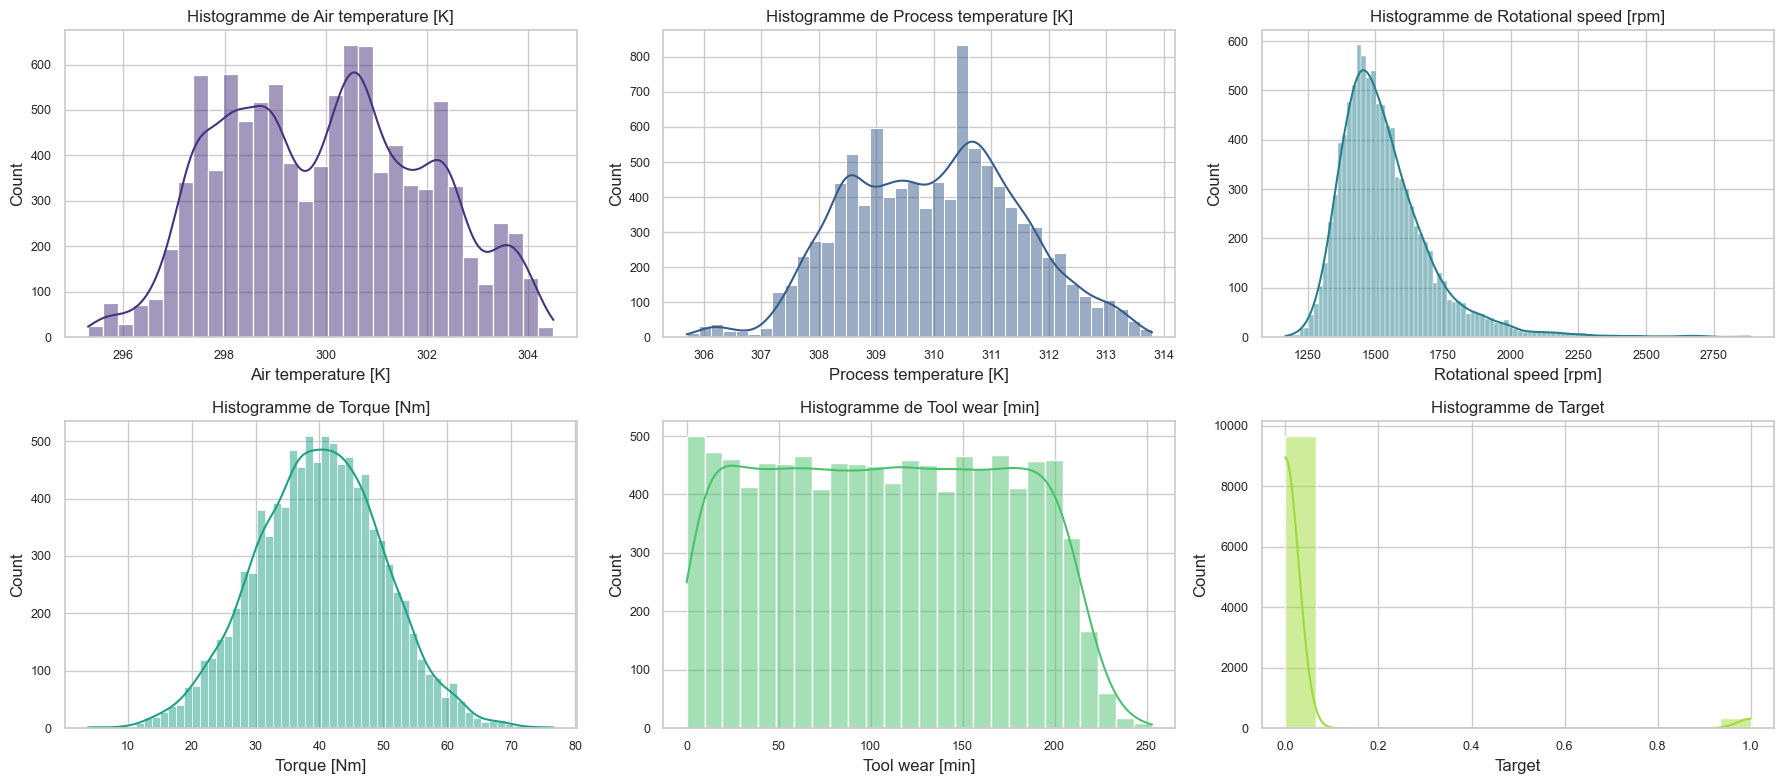

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_single_dimension_data(df):
    sns.set_theme(style="whitegrid")  # Définir un thème pour Seaborn
    numeric_columns = df.select_dtypes(['int', 'float', 'timedelta64'])
    
    n_cols = 3  # Nombre de colonnes par ligne
    n_rows = (len(numeric_columns.columns) + n_cols - 1) // n_cols  # Nombre de lignes nécessaires
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()  # Aplatir les axes pour un accès facile
    
    for i, column in enumerate(numeric_columns.columns):
        ax = axes[i]
        if 'Time' in column:
            ax.plot(df['Time'], df[column], label=column, color=sns.color_palette("viridis")[i % len(numeric_columns.columns)], linewidth=2)
            ax.set(title=f'Courbe de {column}', xlabel='Temps', ylabel=column)
            ax.legend()
        else:
            sns.histplot(df[column], kde=True, color=sns.color_palette("viridis")[i % len(numeric_columns.columns)], ax=ax)
            ax.set(title=f'Histogramme de {column}', xlabel=column)

        ax.tick_params(axis='both', which='major', labelsize=9)
    
    # Supprimer les sous-graphes inutilisés
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
    plt.show()

# Exemple d'utilisation
num_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
visualize_single_dimension_data(df[num_columns])

#### Boxplot des variables numériques

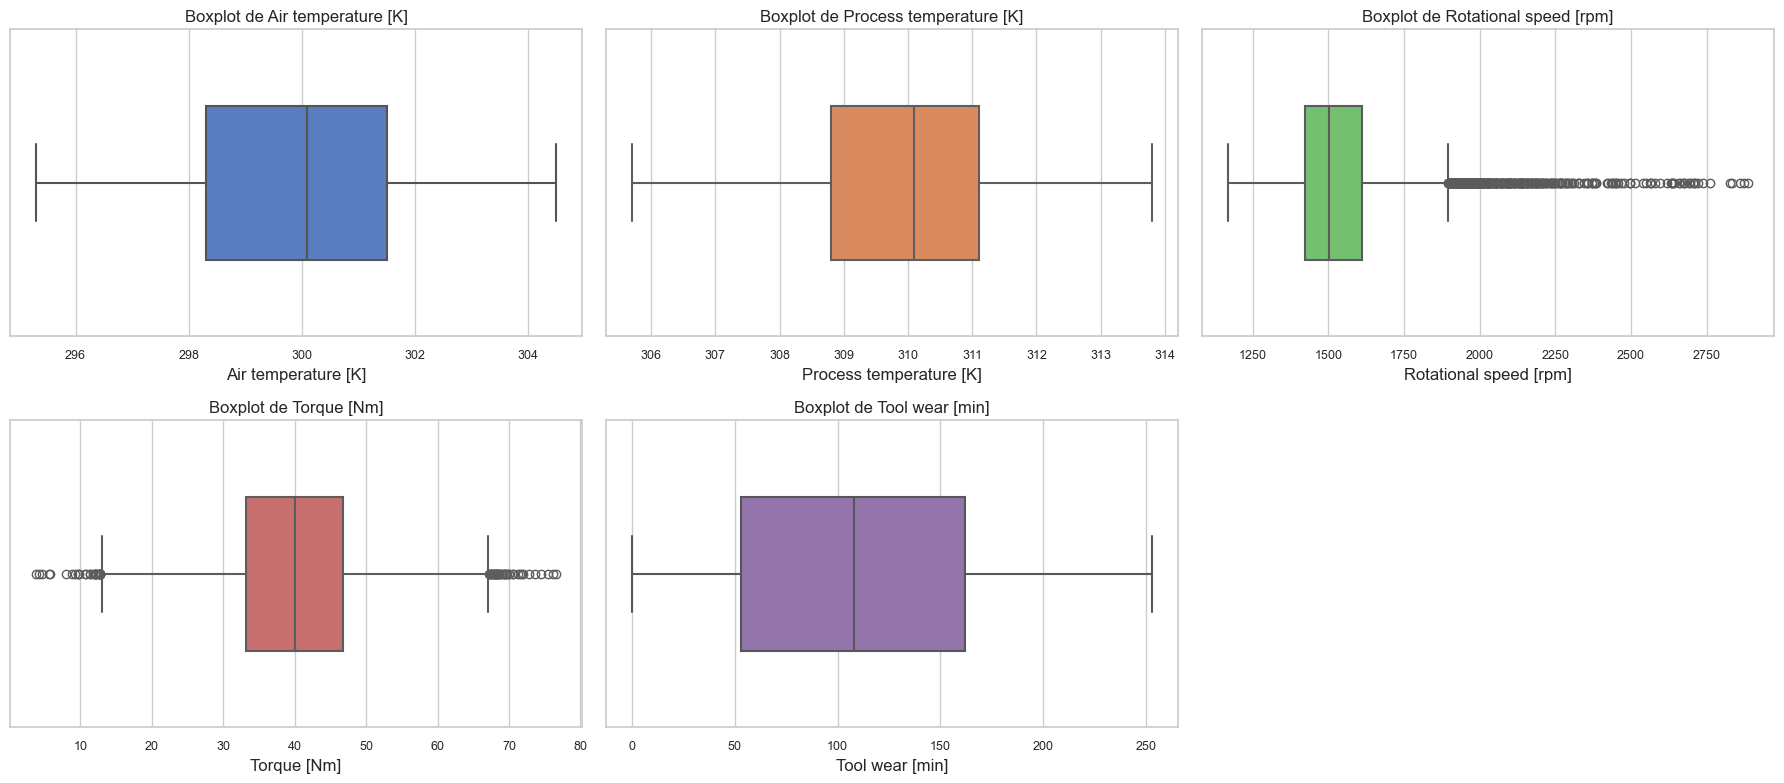

In [33]:
def plot_boxplots(df):
    sns.set_theme(style="whitegrid")  # Définir un thème pour Seaborn
    numeric_columns = df.select_dtypes(['int', 'float', 'timedelta64'])
    
    n_cols = 3  # Nombre de colonnes par ligne
    n_rows = (len(numeric_columns.columns) + n_cols - 1) // n_cols  # Nombre de lignes nécessaires
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()  # Aplatir les axes pour un accès facile
    
    palette = sns.color_palette("muted", len(numeric_columns.columns))  # Palette de couleurs
    
    for i, column in enumerate(numeric_columns.columns):
        sns.boxplot(data=df, x=column, ax=axes[i], color=palette[i % len(palette)], width=0.5, linewidth=1.5)
        axes[i].set(title=f'Boxplot de {column}', xlabel=column)
        axes[i].tick_params(axis='both', which='major', labelsize=9)  # Améliorer les ticks pour lisibilité
    
    # Supprimer les sous-graphes inutilisés
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
    plt.show()  # Afficher les graphiques

# Exemple d'utilisation
plot_boxplots(df[num_columns])

### 3.3 Visualisation des Variables Categorielles

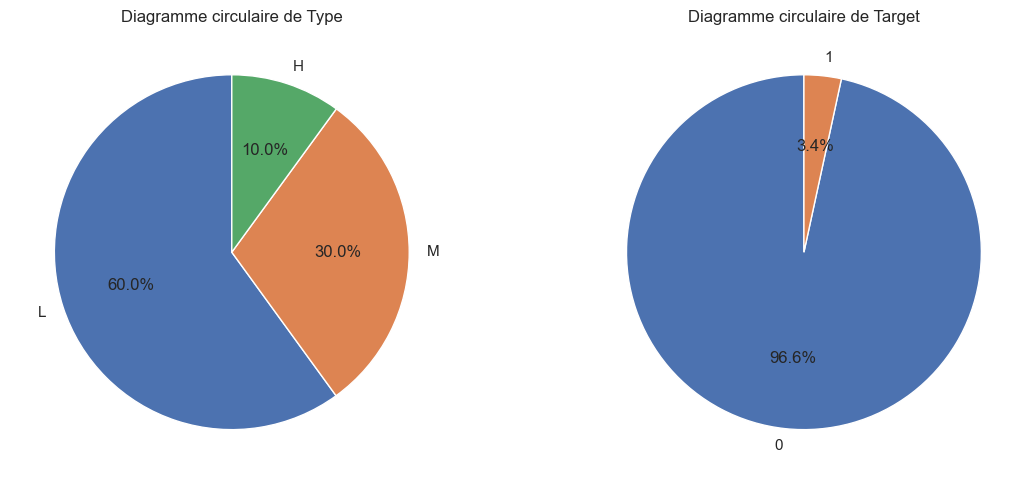

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pie_charts(df, cat_columns):
    """
    Visualisation des diagrammes circulaires pour chaque colonne catégorielle d'un DataFrame.
    
    Parameters:
    df (DataFrame) : Le DataFrame contenant les colonnes catégorielles à visualiser.
    cat_columns (list) : Liste des colonnes catégorielles.
    """
    n_cols = 2  # Nombre de colonnes par ligne
    n_rows = (len(cat_columns) + n_cols - 1) // n_cols  # Nombre de lignes nécessaires

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
    axes = axes.flatten()  # Aplatir les axes pour un accès facile

    for i, column in enumerate(cat_columns):
        # Calculer les valeurs et les étiquettes pour le diagramme circulaire
        counts = df[column].value_counts()
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Diagramme circulaire de {column}', fontsize=12)

    # Supprimer les sous-graphes inutilisés
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
    plt.show()  # Afficher les graphiques

# Exemple d'utilisation
cat_columns = ['Type', 'Target', 'Failure Type']
plot_pie_charts(df, cat_columns)

Le dataset ne contient que 3.4% de cas de pannes. Le données sont déséquilibrées. Par la suite nous allons appliquer des techniques adaptées pour corriger ce problème.

/var/folders/l9/dhmb1tyx1h37xyzk_tmmg0hr0000gn/T/ipykernel_20123/2165693256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.index, x=counts.values, palette='viridis')


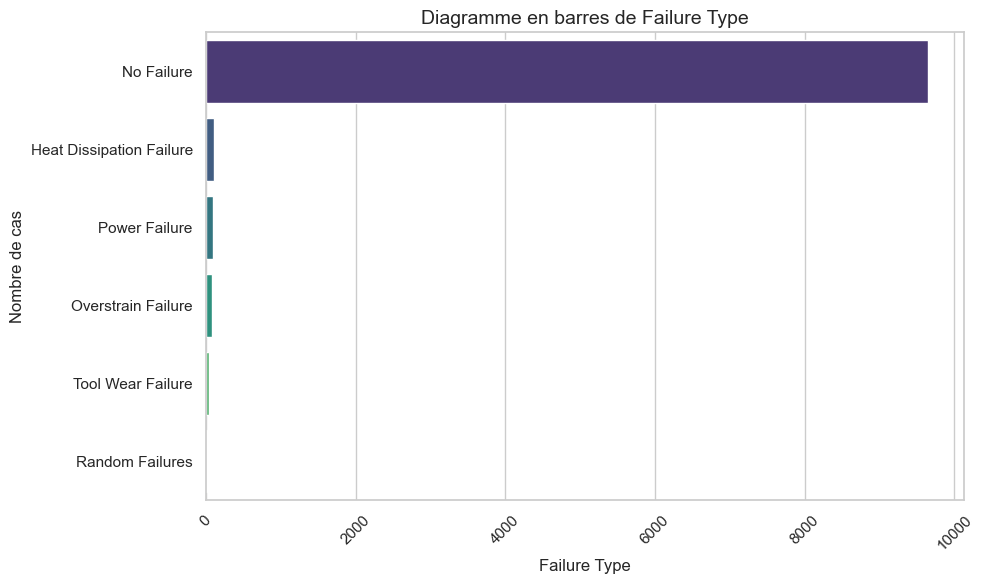

In [39]:
def plot_bar_chart(df, column):
    plt.figure(figsize=(10, 6))
    
    # Calculer les valeurs et les étiquettes pour le diagramme en barres
    counts = df[column].value_counts()
    
    sns.barplot(y=counts.index, x=counts.values, palette='viridis')
    plt.title(f'Diagramme en barres de {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Nombre de cas', fontsize=12)
    plt.xticks(rotation=45)  # Faire pivoter les étiquettes pour une meilleure lisibilité
    plt.tight_layout()  # Ajuster l'espacement
    plt.show()  # Afficher le graphique

# Exemple d'utilisation
plot_bar_chart(df, 'Failure Type')

## 4. Analyse Bivarié

### 4.1 Analyse des variables numériques 

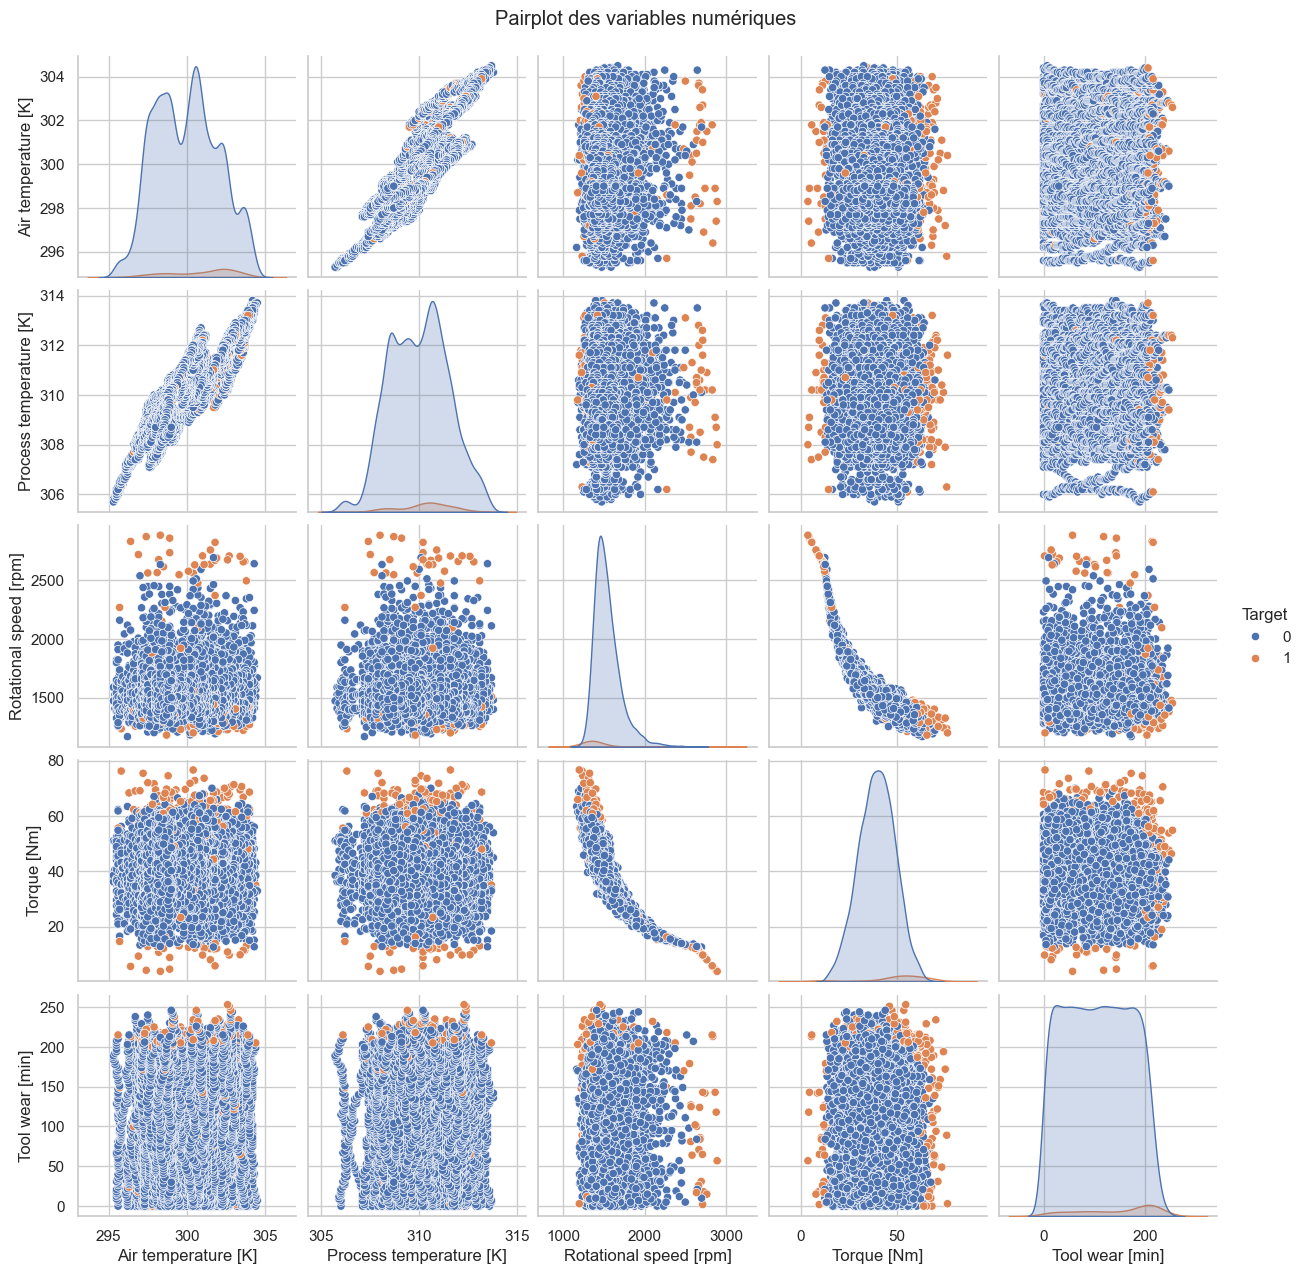

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pairplot(df):
    # Créer le pairplot
    sns.pairplot(df, hue='Target',diag_kind='kde')
    
    plt.suptitle('Pairplot des variables numériques', y=1.02)  # Titre du graphique
    plt.show()  # Afficher le graphique

# Exemple d'utilisation
plot_pairplot(df[num_columns])

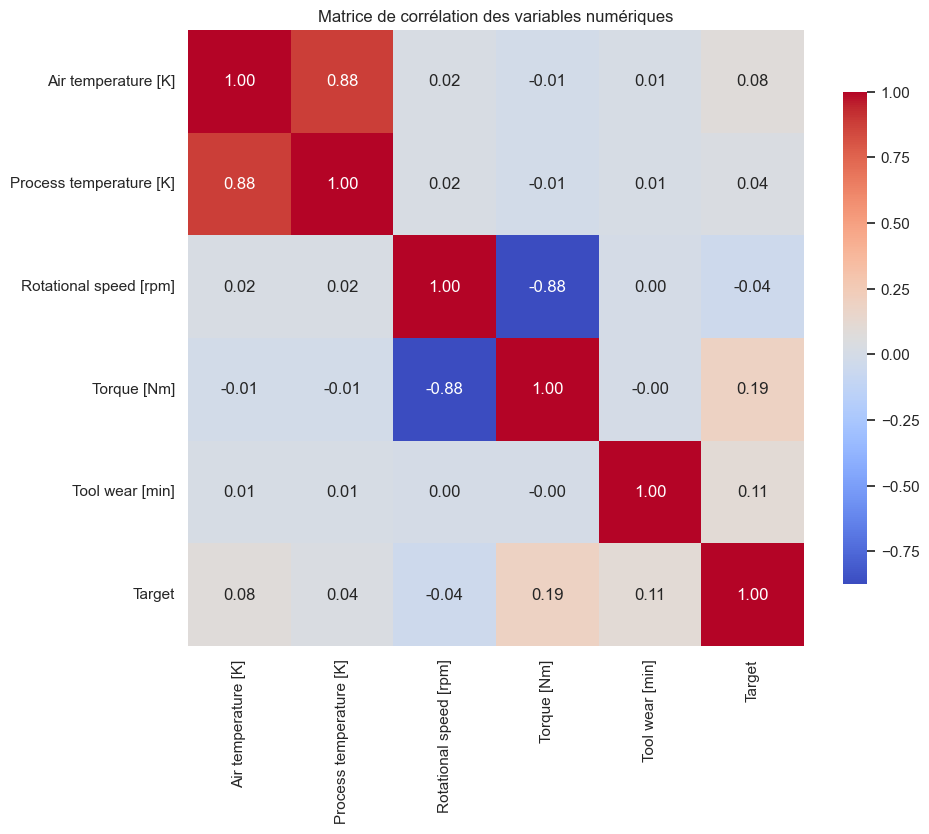

In [48]:
def plot_heatmap(df):
    # Calculer la matrice de corrélation
    corr = df.corr()
    
    # Créer la heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    
    plt.title('Matrice de corrélation des variables numériques')  # Titre du graphique
    plt.show()  # Afficher le graphique

# Exemple d'utilisation
plot_heatmap(df[num_columns])

Variables corrélées entre eux :
 - Air temperature et Process Temperature
 - Rotational speed et Torque

### 4.2 Analyse des variables catégorielles

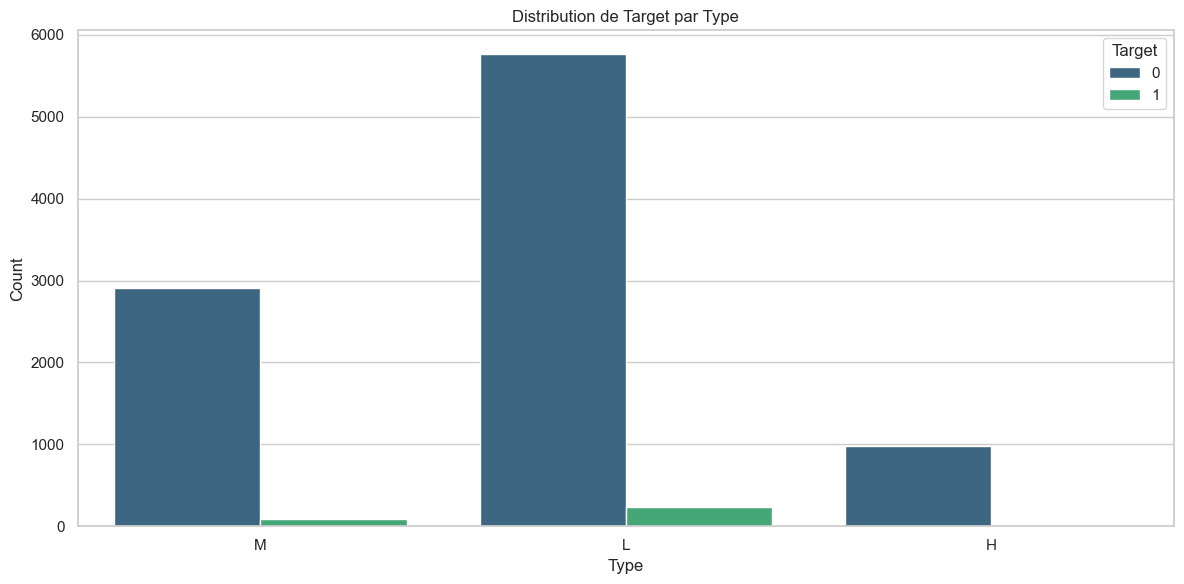

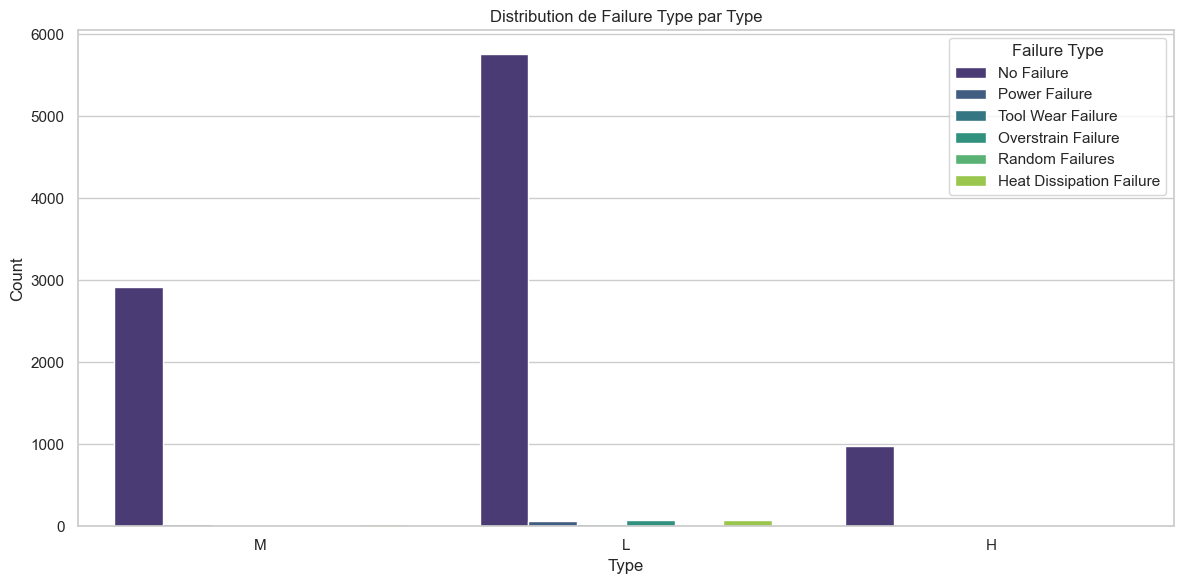

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_categorical(df, categorical_var, target_vars):
    for target in target_vars:
        plt.figure(figsize=(12, 6))

        # Graphique en barres
        sns.countplot(data=df, x=categorical_var, hue=target, palette='viridis')
        plt.title(f'Distribution de {target} par {categorical_var}')
        plt.xlabel(categorical_var)
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

# Exemple d'utilisation
categorical_var = 'Type'  # Remplacez par le nom de votre variable catégorielle
target_vars = ['Target', 'Failure Type']  # Liste des variables cibles
analyze_categorical(df, categorical_var, target_vars)